# Keramik

* [Vertretene Scherbentypen](#Vertretene-Scherbentypen)
* [Fragmentierung](#Fragmentierung)
* [Aufgenommene vs. Ausgezählte Stücke](#Aufgenommene-vs.-Ausgezählte-Stücke)
    * [Nur ausgezählte Stücke](#Nur-ausgezählte-Stücke)
    * [Anteile aufgenommener & ausgezählter Stücke in Oberflächenabsammlungen](#Anteile-aufgenommener-&-ausgezählter-Stücke-in-Oberflächenabsammlungen)
* [Anteil bestimmter Typen im Datensatz](#Anteil-bestimmter-Typen-im-Datensatz)
* [Anteil unverzierter Stücke im Datensatz](#Anteil-unverzierter-Stücke-im-Datensatz)
* vgl. Jesse 2003
    * [Anzahl Scherben je GE](#Anzahl-Scherben-je-GE)
    * [Mittleres Gewicht von GE](#Mittleres-Gewicht-von-GE)
    * [Mittleres Gewicht von Scherben](#Mittleres-Gewicht-von-Scherben)
* [Abhängigkeit Scherbengröße-/ Scherbengewicht](#Abhängigkeit-Scherbengröße-/-Scherbengewicht)
    * [Fragmentierte Stücke](#Fragmentierte-Stücke)
* [Wandungsdicke der Keramik](#Wandungsdicke-der-Keramik)
* [Oberflächenbehandlung der Scherben](#Oberflächenbehandlung-der-Scherben)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

from matplotlib.ticker import ScalarFormatter

import sys, os
sys.path.append("/Python")
from myfunctions import *

style = '*'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Vertretene Scherbentypen

In [88]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Art,
           t_Obj.Scherbe,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = "K")
           AND (length(t_Obj.Scherbe) = 1)
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
# display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [89]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = sum)

# Ergebis in Data-Frame ändern
df_pivot = pd.DataFrame(df_pivot)

# Prozent-Anteil der Verzierungselemente errechnen
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100

# manuelle Sortierung der Tabelle:
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))

df_pivot = df_pivot.rename(index={'G': 'Gefäße'})
df_pivot = df_pivot.rename(index={'R': 'Rand-\nscherben'})
df_pivot = df_pivot.rename(index={'W': 'Wand-\nscherben'})
df_pivot = df_pivot.rename(index={'B': 'Boden-\nscherben'})

df_pivot

,Anzahl,Prozent
Gefäße,148.0,1.820418
Rand-\nscherben,3216.0,39.557196
Wand-\nscherben,4592.0,56.482165
Boden-\nscherben,174.0,2.140221


In [92]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = False, color = 'grey', figsize = (5,5))
plt.xticks(rotation=0)
# plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
# plt.title('Scherbentypen\n')
plt.savefig('../output/figs/2-2-1_KeramikScherbentyp.pdf', bbox_inches='tight')
plt.show()

> **Keramik** Scherbentypen

## Fragmentierung

In [135]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Art,
           t_Obj.Gr_Clist,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Gr_Clist) != '')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
# display(df.head())

In [136]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Gr_Clist', aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
# Prozent-Anteil der Verzierungselemente errechnen
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot = df_pivot.rename(index={500: '>200'})
df_pivot

,Anzahl,Prozent
Gr_Clist,,
30,1379,25.316688
70,2968,54.488709
120,832,15.274463
200,208,3.818616
>200,60,1.101524


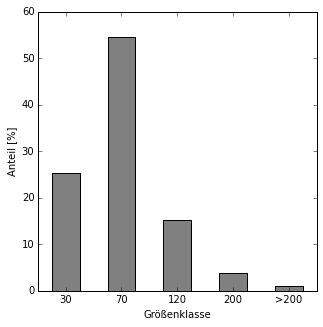

In [137]:
df_pivot.plot(y = 'Prozent', kind = 'bar',legend = False, color = 'grey', figsize = (5,5))
plt.xticks(rotation=0)
plt.xlabel('Größenklasse')
plt.ylabel('Anteil [%]')
# plt.title('Fragmentierungsgrad\n')
plt.savefig('../output/figs/2-2-1_KeramikFragmentierung.pdf', bbox_inches='tight')
plt.show()

> **Keramik** Fragmentierung.

## Aufgenommene vs. Ausgezählte Stücke

aufgenommene Stücke:

* Anzahl = 1

In [2]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Art, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Gr_Clist) != '')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
# df['Gr_Clist'] = df['Gr_Clist'].convert_objects(convert_numeric=True)
# df['Gr_Clist'] = df['Gr_Clist'].replace([500], [300])

display(df.head())

,objID,Art,Gewicht,Gr_Clist
0,10,K,19.0,70
1,11,K,31.0,70
2,12,K,109.0,120
3,13,K,8.0,70
4,14,K,68.0,120


In [3]:
len(df)

4217

Mittelwerte der Größenklassen

In [3]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Gr_Clist', aggfunc = np.mean)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.rename(index={500: '>200'})
df_pivot

,Gewicht
Gr_Clist,
30,7.173284
70,25.507131
120,90.103137
200,378.090909
>200,1394.016949


die großen Stücke '>200'/500 werden entfernen, da es sich hierbei ja um eine nach oben offene Klasse handelt

In [4]:
#df = df[df['Gr_Clist'] != 500]

In [5]:
df.rename(columns={'Gr_Clist':'Gr'}, inplace=True)

In [6]:
x

NameError: name 'x' is not defined

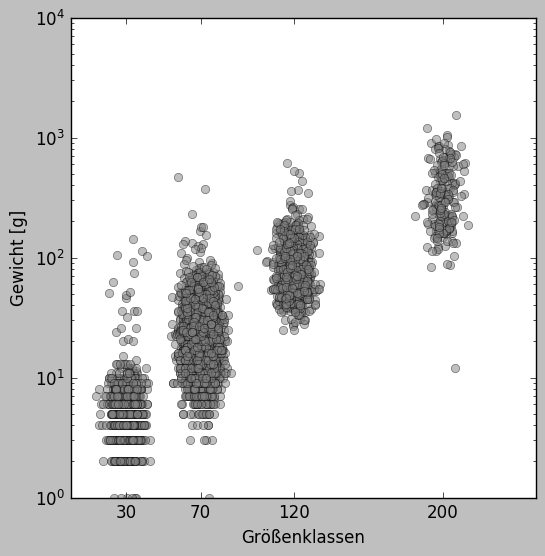

In [10]:
plt.style.use('classic') # Matplotlib 1 Style

# Add some random "jitter" to the x-axis
y = df['Gewicht']
x = np.random.normal(df['Gr'], 5, size=len(y))
fig = plt.figure(1)
fig.set_size_inches(6, 6)
ax = fig.add_subplot(1, 1, 1)

#plt.axvline(30, color='grey', linestyle = '--')
#plt.axvline(70, color='grey', linestyle = '--')
#plt.axvline(120, color='grey', linestyle = '--')
#plt.axvline(200, color='grey', linestyle = '--')

plt.plot(x, y, 'o', alpha = .5, color = 'grey')
plt.xlim((0,250))
plt.yscale('log')

ax.set_xticks([30, 70, 120, 200])

plt.ylabel('Gewicht [g]')
plt.xlabel('Größenklassen')

#ax.set_xticklabels(['30', '70', '120', '200', '>200'])

plt.savefig('../output/figs/2-2_Keramik_Gr-Gew.pdf', bbox_inches='tight')
plt.show()

> **Keramik** Verhältnis von Scherbengröße und -gewicht

In [23]:
# als Boxplot
a = df[['Gewicht','Gr']]

In [35]:
# ax = a.boxplot(by = 'Gr', figsize = (6, 6), whis = [15.85, 84.15]) # 1-Sgima
ax = a.boxplot(by = 'Gr', figsize = (5, 5), whis = [2.3, 97.7]) # 2-Sigma
#plt.axvline(mean, color='black', ls = 'dashed', lw = 3, label='mean')
plt.ylabel("Gewicht [g]")
plt.xlabel('Größenklasse')
#legend = plt.legend(["Mittelwert"])
#legend.get_frame().set_facecolor('white')
plt.title("")
plt.suptitle("")
plt.yscale('log')


# http://stackoverflow.com/questions/21920233/matplotlib-log-scale-tick-label-number-formatting
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

ax.xaxis.grid(False)
ax.yaxis.grid(False)

ax.set_xticklabels(['30', '70', '120', '200', '>200'])

plt.savefig('../output/figs/2-2_Keramik_Gr-Gew_BoxPlt.pdf', bbox_inches='tight')

In [36]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)

a.pivot_table(values = 'Gewicht', 
              index = 'Gr', 
              aggfunc = (min, my25, np.mean, np.median, my75, max))

,min,my25,mean,median,my75,max
Gr,,,,,,
30,1.0,4.0,7.168554,5.0,8.0,142.0
70,1.0,14.0,25.507131,21.0,32.0,466.0
120,25.0,56.0,90.103137,77.0,108.0,611.0
200,12.0,196.0,378.090909,316.0,502.0,1540.0
500,495.0,717.5,1394.016949,1027.0,1664.5,5000.0


n

In [37]:
len(a.index)

4218

> **ToDo**:
> 
> [ ] lineare Regression in den Plot hinein; siehe: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html (hat am 13.04.2015 nicht geklappt!)

### Nur ausgezählte Stücke

ausgezählte Stücke:

* Anzahl ist nicht leer (!= '') und > 1

In [114]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Art, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Obj.Anzahl) > 1)
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,Art,Anzahl,Gewicht,Gr_Clist
0,2510,K,12,85,
1,2511,K,29,181,
2,2512,K,19,130,
3,2513,K,10,68,
4,2514,K,2,8,


In [118]:
df['indGew'] = df['Gewicht'] / df['Anzahl']

In [116]:
bins = round(df['indGew'].max() - df['indGew'].min())
bins

104

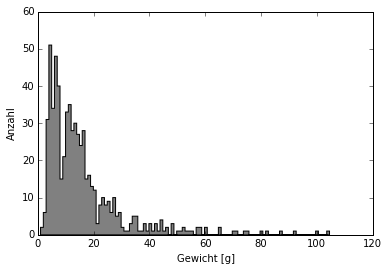

In [49]:
ax = df['indGew'].hist(bins = bins, color = 'grey', histtype='stepfilled')

# ax = df['indGew'].hist(bins = bins, color = 'grey', histtype='stepfilled')
# plt.axvline(mean, color='r', linestyle = '--')

plt.xlabel("Gewicht [g]")
plt.ylabel("Anzahl")

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.savefig('../output/figs/2-2_Keramik_ausgezaehltGew.pdf', bbox_inches='tight')
plt.show()

### Anteile aufgenommener & ausgezählter Stücke in Oberflächenabsammlungen

Liste der ausgezählten Stücke aus Oberflächenabsammlungen:

In [54]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist,
           t_Obj.Typ,
           t_Obj.Notiz
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Komplex.bef_art) = 'Oberfl')
           AND ((t_Obj.Anzahl) != 1)
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df1 = pd.read_sql(sql, con)
# display(df1.head())
df_pivot1 = df1.pivot_table(values = 'Anzahl', index = 'ort_kurz', aggfunc = sum)
df_pivot1 = pd.DataFrame(df_pivot1)
df_pivot1 = df_pivot1.reset_index()
display(df_pivot1.head())

,ort_kurz,Anzahl
0,BAT,24
1,BBL,22
2,BBS,74
3,BGA,6
4,BJJ,47


Das mittlere/individuelle Scherbengewicht je ausgezählter Aufnahmeeinheit ausrechnen (<code>Gewicht/Anzahl</code>):

In [55]:
df1['GewichtInd'] = df1['Gewicht'] / df1['Anzahl']
df1['GewichtInd'].describe()

count    425.000000
mean      19.222764
std       15.181571
min        2.333333
25%       10.263158
50%       15.000000
75%       23.500000
max      104.571429
Name: GewichtInd, dtype: float64

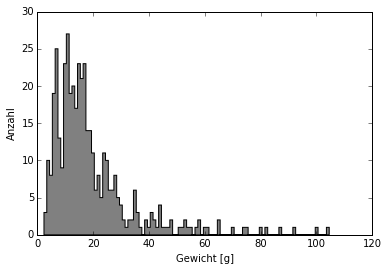

In [56]:
bins = round(df1['GewichtInd'].max() - df1['GewichtInd'].min())
ax = df1['GewichtInd'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.xlabel('Gewicht [g]')
plt.ylabel('Anzahl')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.savefig('../output/figs/2-2_Keramik_ausgezaehltGew-Oberfl.pdf', bbox_inches='tight')
plt.show()

> **Keramik** Mittleres Scherbengewicht ausgezählter Stücke in Oberflächenabsammlungen

Liste der einzeln aufgenommen Stücke:

In [57]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Typ,
           t_Obj.Notiz
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Komplex.bef_art) = 'Oberfl')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df2 = pd.read_sql(sql, con)
# display(df2.head())
# Anzahl einzeln aufgenommener Scherben je FdSt:
df_pivot2 = df2.pivot_table(values = 'Anzahl', index = 'ort_kurz', aggfunc = sum)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2 = df_pivot2.reset_index()
display(df_pivot2.head())

,ort_kurz,Anzahl
0,BAT,30
1,BBL,54
2,BBS,85
3,BDA,30
4,BGA,49


In [58]:
# die beiden separeten Tabellen über 'ort_kurz' zusammenfassen (Achtung: Einträge die nur in einer der beiden Tabellen vorkommen werden ans Ende gestellt):
df_merge = pd.merge(df_pivot1, df_pivot2, on = 'ort_kurz', how = 'outer', suffixes = ('_ausgezählt','_individuell'))
display(df_merge.head())

,ort_kurz,Anzahl_ausgezählt,Anzahl_individuell
0,BAT,24,30
1,BBL,22,54
2,BBS,74,85
3,BGA,6,49
4,BJJ,47,40


In [59]:
df_merge.to_csv('../data/processed/Keramik - Obfl-Komplexe - ausgezählt vs aufgenommen.csv', index = False, encoding='utf-8')

In [60]:
df_merge['Anzahl_Summe'] = df_merge['Anzahl_ausgezählt'] + df_merge['Anzahl_individuell']
df_merge['Prozent_ausgezählt'] = df_merge['Anzahl_ausgezählt']/df_merge['Anzahl_Summe']
df_merge['Prozent_individuell'] = df_merge['Anzahl_individuell']/df_merge['Anzahl_Summe']
df_merge['Prozent_Summe'] = df_merge['Prozent_ausgezählt'] + df_merge['Prozent_individuell']
# df_merge nach dem Anteil ausgezählte Stücke sortieren
df_merge = df_merge.sort_index(by=['Prozent_ausgezählt'], ascending=[False])
display(df_merge.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,ort_kurz,Anzahl_ausgezählt,Anzahl_individuell,Anzahl_Summe,Prozent_ausgezählt,Prozent_individuell,Prozent_Summe
59,NGL,77,35,112,0.687500,0.312500,1
57,NGB,87,42,129,0.674419,0.325581,1
68,YEN,10,5,15,0.666667,0.333333,1
32,LMS,23,13,36,0.638889,0.361111,1
31,LKL,19,11,30,0.633333,0.366667,1


In [61]:
# gemeinsame Tabelle mit den Anteilen erzeugen
df_merge_plt = df_merge[['Prozent_ausgezählt','Prozent_individuell']]
df_merge_plt = df_merge_plt[np.isfinite(df_merge_plt['Prozent_ausgezählt'])]

In [62]:
df_merge_plt.plot(kind = 'bar', stacked = True)
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.axhline(y = 0.5, color='r', linestyle = '--')

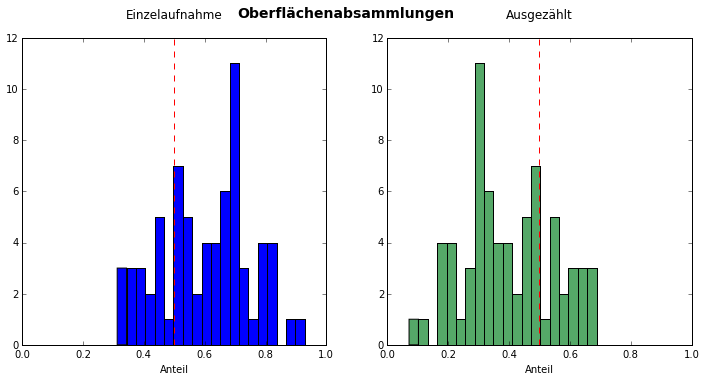

In [63]:
fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121)

ax = df_merge['Prozent_individuell'].hist(bins = 20)
#df_merge['Prozent_individuell'].plot(kind = 'kde', color = 'black', linestyle = '--')
plt.xlim([0,1])
plt.axvline(x = 0.5, color='r', linestyle = '--')
plt.title('Einzelaufnahme\n')
plt.xlabel('Anteil')
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.subplot(122)

ax = df_merge['Prozent_ausgezählt'].hist(bins = 20, color = '#55A868')
#df_merge['Prozent_ausgezählt'].plot(kind = 'kde', color = 'black', linestyle = '--')
plt.xlim([0,1])
plt.axvline(x = 0.5, color='r', linestyle = '--')
plt.title('Ausgezählt\n')
plt.xlabel('Anteil')
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.suptitle('Oberflächenabsammlungen', fontsize=14, fontweight='bold')

Anteil ausgezählter Stücke in den Oberflächenabsammlungen:

In [64]:
df_merge['Prozent_ausgezählt'].describe()

count    70.000000
mean      0.399385
std       0.148456
min       0.071429
25%       0.300581
50%       0.379250
75%       0.500000
max       0.687500
Name: Prozent_ausgezählt, dtype: float64

In [67]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Komplex.bef_nr,
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Typ,
           t_Obj.Notiz
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Komplex.bef_art) != 'Oberfl')
           AND ((t_Obj.Anzahl) != 1)
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df1 = pd.read_sql(sql, con)
# display(df1.head())
df_pivot1 = df1.pivot_table(values = 'Anzahl', index = ['ort_kurz', 'bef_nr'], aggfunc = sum)
df_pivot1 = pd.DataFrame(df_pivot1)
df_pivot1 = df_pivot1.reset_index()
# display(df_pivot1.head())

sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Komplex.bef_nr,
           t_Obj.objID,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ,
           t_Obj.Notiz
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Komplex.bef_art) != 'Oberfl')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df2 = pd.read_sql(sql, con)
# display(df2.head())
df_pivot2 = df2.pivot_table(values = 'Anzahl', index = ['ort_kurz', 'bef_nr'], aggfunc = sum)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2 = df_pivot2.reset_index()
# display(df_pivot2.head())

# die beiden separeten Tabellen über 'ort_kurz' zusammenfassen (Achtung: Einträge die nur in einer der beiden Tabellen vorkommen werden ans Ende gestellt):
df_merge = pd.merge(df_pivot1, df_pivot2, on = ['ort_kurz', 'bef_nr'], how = 'outer', suffixes = ('_ausgezählt','_individuell'))
# display(df_merge.head())

df_merge['Anzahl_Summe'] = df_merge['Anzahl_ausgezählt'] + df_merge['Anzahl_individuell']
df_merge['Prozent_ausgezählt'] = df_merge['Anzahl_ausgezählt']/df_merge['Anzahl_Summe']
df_merge['Prozent_individuell'] = df_merge['Anzahl_individuell']/df_merge['Anzahl_Summe']
df_merge['Prozent_Summe'] = df_merge['Prozent_ausgezählt'] + df_merge['Prozent_individuell']
# df_merge nach dem Anteil ausgezählte Stücke sortieren
df_merge = df_merge.sort_index(by=['Prozent_ausgezählt'], ascending=[False])

display(df_merge.head())
#df_merge

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:59: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,ort_kurz,bef_nr,Anzahl_ausgezählt,Anzahl_individuell,Anzahl_Summe,Prozent_ausgezählt,Prozent_individuell,Prozent_Summe
11,PIK,87/2,878,200,1078,0.814471,0.185529,1
3,MKA,87/102,3,1,4,0.750000,0.250000,1
6,MUN,87/1,291,115,406,0.716749,0.283251,1
2,BLK,87/1,41,17,58,0.706897,0.293103,1
4,MLB,85/1-3-1,206,99,305,0.675410,0.324590,1


In [68]:
df_merge['Prozent_ausgezählt'].describe()

count    13.000000
mean      0.556953
std       0.193277
min       0.130435
25%       0.441176
50%       0.581818
75%       0.706897
max       0.814471
Name: Prozent_ausgezählt, dtype: float64

## Anteil bestimmter Typen im Datensatz

In [22]:
# eindeutig bestimmte Stücke
sql = """SELECT
           t_Obj.objID,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Notiz) Not Like '%1987%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) NOT LIKE '%(?)%')
           AND ((t_Obj.Typ) NOT LIKE '%/%')
           AND ((t_Obj.Typ) NOT NULL))""".replace('\n',' ')
a = pd.read_sql(sql, con)

# fraglich bestimmte Stücke
sql = """SELECT
           t_Obj.objID,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Notiz) Not Like '%1987%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) NOT NULL)
           AND ((t_Obj.Typ) LIKE '%(?)%')
           OR ((t_Obj.Typ) LIKE '%/%'))""".replace('\n',' ')
b = pd.read_sql(sql, con)

# nicht bestimmte Stücke
sql = """SELECT
           t_Obj.objID,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Notiz) Not Like '%1987%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) IS NULL))""".replace('\n',' ')
c = pd.read_sql(sql, con)

In [23]:
df = pd.Series({'eindeutig':len(a),
               'fraglich':len(b),
               'unbestimmt':len(c)})
df = pd.DataFrame(df)
df['Prozent'] = df[0]/df[0].sum()*100
df

,0,Prozent
eindeutig,2202,41.476738
fraglich,1340,25.240158
unbestimmt,1767,33.283104


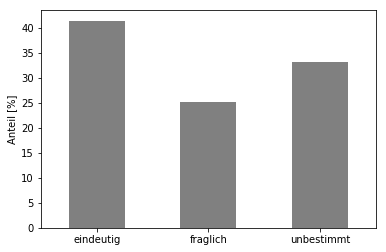

In [24]:
df.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

## Anteil unverzierter Stücke im Datensatz

### Oberflächenabsammlungen

In [72]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Art) == 'K')
            AND ((t_Komplex.bef_Art) Like "%Oberfl%")
            AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,914,23.789693
verziert,2928,76.210307


### Grabungen etc.

In [73]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Art) == 'K')
            AND ((t_Komplex.bef_Art) Not Like "%Oberfl%")
            AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,415,27.37467
verziert,1101,72.62533


### Grabungen in MLB (angeblich nix verworfen)

In [74]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Art) == 'K')
            AND ((t_Komplex.bef_Art) Not Like "%Oberfl%")
            AND ((t_ort.ort_kurz) = 'MLB')
            AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace = True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,36,17.73399
verziert,167,82.26601


### Grabungen in PIK (definitiv Stücke verworfen)

In [75]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Art) == 'K')
            AND ((t_Komplex.bef_Art) Not Like "%Oberfl%")
            AND ((t_ort.ort_kurz) = 'PIK')
            AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace = True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,198,24.264706
verziert,618,75.735294


### Anzahl Verzierungselemente je Obj

In [76]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Art) == 'K')
            AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# df['pos'].fillna('unverz', inplace=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'verzName', aggfunc = len)

# Mehrfachnennungen ausschließen - am Ende soll jede Verzierung pro Obj nur noch einmal vorkommen
a = df_pivot.unstack()
a = pd.DataFrame(a)
a = a.reset_index()
a = a.dropna()
a[1] = 1
df_pivot = a.pivot_table(values = 1, index = 'objID', columns = 'verzName', aggfunc = len)
df_pivot['SUM'] = df_pivot.sum(axis=1)
df_pivot['SUM'].describe()

count    3904.000000
mean        1.771260
std         0.964225
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        12.000000
Name: SUM, dtype: float64

(1.0, 13.0)

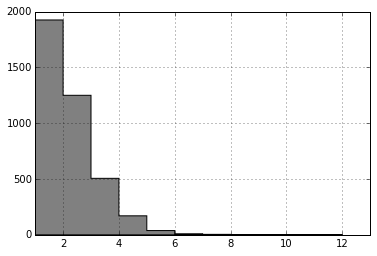

In [77]:
bins = df_pivot['SUM'].max() - df_pivot['SUM'].min()
df_pivot['SUM'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.xlim([df_pivot['SUM'].min(),df_pivot['SUM'].max()+1])

In [78]:
# Obj mit den meisten Verzierungen
df_pivot.loc[df_pivot['SUM'] == df_pivot['SUM'].max()]

verzName,01.1,01.10,01.11,01.2,01.3,01.4,01.5,01.6,01.7,01.8,...,21.3,21.4,21.5,21.6,21.7,21.8,21.9,22.1,22.2,SUM
objID,,,,,,,,,,,,,,,,,,,,,
1111,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [79]:
df_pivot = df_pivot.reset_index()
b = df_pivot.pivot_table(values = 'objID', index = 'SUM', aggfunc = len)
b

SUM
1     1925
2     1250
3      506
4      170
5       38
6        9
7        4
8        1
12       1
Name: objID, dtype: int64

In [80]:
(b.sum()-7) / b.sum() * 100

99.82069672131148

## Anzahl Scherben je GE

siehe Jesse 2003, 86

In [81]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fragm
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

# nur Obfl.-Absammlungen
#           AND ((t_Komplex.bef_art) = 'Oberfl')

# nur solche Stücke die aus mehr als einer Scherbe bestehen
#            AND ((t_Obj.Fragm) != '')

df = pd.read_sql(sql, con)

# leere Fragmentfelder mit 1 gefüllt
df['Fragm'] = df['Fragm'].fillna(1)

# Plot der Verteilung
mean = df['Fragm'].mean()
plt.axvline(mean, color='r', linestyle = '--')
df['Fragm'].plot(kind = 'kde')
plt.xlim([0,10])
plt.legend(["Mittelwert"])
plt.show()

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [82]:
df['Fragm'].describe()

count    4655.000000
mean        1.533835
std         2.893706
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        76.000000
Name: Fragm, dtype: float64

In [83]:
df['Fragm'].sum()

7140.0

In [125]:
# nur solche Stücke die aus mehr als einer Scherbe bestehen
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fragm
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Fragm'] = df['Fragm'].convert_objects(convert_numeric=True)
df['Fragm'].describe()

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


count    650.000000
mean       4.823077
std        6.888575
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       76.000000
Name: Fragm, dtype: float64

In [126]:
df['Fragm'].sum()

3135.0

## Mittleres Gewicht von Scherben in GE

In [86]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] AS Ind,
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fragm,
           t_Obj.Gewicht
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

# nur von der Oberfläche
#           AND ((t_Komplex.bef_art) = 'Oberfl')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Fragm'] = df['Fragm'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)

# leere Fragmentfelder mit 1 gefüllt, damit individuelles Scherbengewicht berechnet werden kann
df['Fragm'] = df['Fragm'].fillna(1)

# df['GewGE'] = df['Gewicht'] / df['Anzahl']
# df['GewScherbe'] = df['GewGE'] / df['Fragm']

df['GewScherbe'] = df['Gewicht'] / df['Fragm']

# display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [87]:
df['GewScherbe'].describe()

count    4648.000000
mean       51.264788
std       191.841287
min         1.000000
25%        10.000000
50%        20.000000
75%        41.600000
max      5000.000000
Name: GewScherbe, dtype: float64

In [88]:
# gemittelt über die Komplexe:
df_pivot = df.pivot_table(values = 'GewScherbe', index = 'Ind', aggfunc = np.mean)
df_pivot.describe()

count     168.000000
mean      132.613040
std       303.412810
min         5.000000
25%        20.882941
50%        34.918750
75%        60.769345
max      1655.250000
Name: GewScherbe, dtype: float64

## Mittleres Gewicht von GE

In [89]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr],
           t_Obj.objID,
           t_Obj.Gewicht
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_obj.Anzahl) = 1)
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

# nur von der Oberfläche
#           AND ((t_Komplex.bef_art) = 'Oberfl')

df = pd.read_sql(sql, con)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
# display(df.head())
df['Gewicht'].describe()

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


count    4648.000000
mean       66.997719
std       212.128627
min         1.000000
25%        11.000000
50%        23.000000
75%        50.000000
max      5000.000000
Name: Gewicht, dtype: float64

## Abhängigkeit Scherbengröße / Scherbengewicht

In [90]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Art, 
           t_Obj.Gewicht,
           t_Obj.Wandung,
           t_Obj.Gr_Clist
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Gr_Clist) != '')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,Art,Gewicht,Wandung,Gr_Clist
0,10,K,19,6,70
1,11,K,31,8,70
2,12,K,109,9,120
3,13,K,8,6,70
4,14,K,68,7,120


In [91]:
# den ganzen Mist brauche ich gleich um den kleinen Rahmen in (A) in der folgenden Grafik zu zeichnen:
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.), # left, bottom
    (0., 2.), # left, top
    (200., 2.), # right, top
    (200., 0.), # right, bottom
    (0., 0.), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)

In [94]:
x = df['Gewicht'] / df['Wandung']
y = df['Gewicht'] / df['Gr_Clist']

# eigentliche Abbildung

fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

ax1 = plt.subplot(121)

plt.plot(x, y, 'o', alpha=0.5, color = 'grey')
plt.xlabel("Gewicht / Wandungsdicke")
plt.ylabel("Gewicht / Größenklasse")
ax1.text(220, 1.6, 'B', fontsize=15)
patch = patches.PathPatch(path, ls = 'dashed', lw=1, fill=None)
ax1.add_patch(patch)

ax2 = plt.subplot(122)

plt.plot(x, y, 'o', alpha=0.5, color = 'grey')
plt.xlim([0,200])
plt.ylim([0,2])
plt.xlabel("Gewicht / Wandungsdicke")
plt.ylabel("Gewicht / Größenklasse")

plt.savefig('../output/figs/2-2_Keramik_Gew-Wand-Gr.pdf', bbox_inches='tight')
plt.show()

## Fragmentierte Stücke 

(Anzahl = 1 AND Fragm != 1)

In [95]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Fragm,
           t_Obj.Typ,
           t_Obj.Notiz
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Fragm) != '')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Fragm'].describe()

count    650.000000
mean       4.823077
std        6.888575
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       76.000000
Name: Fragm, dtype: float64

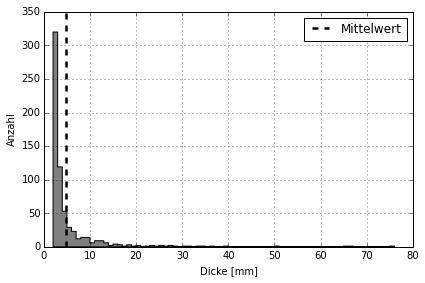

In [96]:
bins = df['Fragm'].max() - df['Fragm'].min()

mean = df['Fragm'].mean()

df['Fragm'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()
plt.show()

## Wandungsdicke der Keramik

In [2]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Wandung, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.Wandung) <> 0)
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Wandung,Art
0,BAT,85/101,3,DAM (?),6,K
1,BAT,85/101,4,None,8,K
2,BAT,85/101,13,None,9,K
3,BAT,85/101,25,None,6,K
4,BAT,85/101,26,None,7,K


In [11]:
bins = df['Wandung'].max() - df['Wandung'].min()
bins

22.0

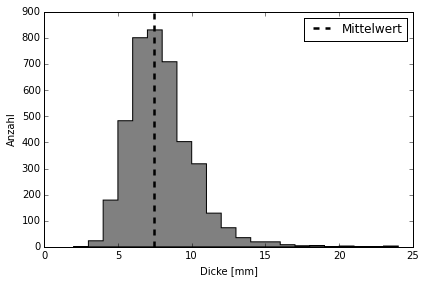

In [99]:
# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

ax = df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
plt.savefig('../output/figs/2-2-1_Keramik_Wandungsdicke1.pdf', bbox_inches='tight')
plt.show()

> **Keramik** Wandungsdicke

Shapiro-Wilk Test auf Normalverteilung: http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [100]:
from scipy import stats
stats.shapiro(df['Wandung']) 

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\scipy\stats\morestats.py:997: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(nan, 1.0)

In [101]:
mean

7.427000988142293

In [102]:
fig = plt.figure(1)
fig.set_size_inches(12, 4)

ax = plt.subplot(121)
df['Wandung'].hist(bins = bins, normed=True, cumulative=True, color = 'lightgrey')
plt.title("Wandungsdicke")
plt.xlabel("cumulative distribution function")
plt.ylabel("Anzahl")
ax.xaxis.grid(False)
ax.yaxis.grid(False)

ax = plt.subplot(122)
df['Wandung'].diff().hist(bins = bins, color = 'grey')
plt.title("Wandungsdicke")
plt.xlabel("1st discrete difference")
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.savefig('../output/figs/2-2-1_Keramik_Wandungsdicke2.pdf', bbox_inches='tight')
plt.show()

In [103]:
# df_pivot = df.pivot_table(values = 'Wandung', index = 'Typ', columns = 'Art', aggfunc = np.mean)

Abfrage, bei der der Typ keine Fragezeichen enthält:

In [104]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Wandung, 
           t_Obj.Art, 
           t_Obj.Form_Gef
       FROM t_Obj 
       WHERE (((t_Obj.Wandung) <> 0)
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Typ) Not Like '%?%')
           AND ((t_Obj.Typ) Not Like '%/%')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Typ,Wandung,Art,Form_Gef
0,BAT,85/101,4,,8,K,
1,BAT,85/101,13,Roulette,9,K,G8a (?)
2,BAT,85/101,25,Roulette,6,K,
3,BAT,85/101,26,,7,K,
4,BAT,85/101,39,Roulette,7,K,


In [105]:
df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Wandung', index = 'Typ', aggfunc = np.mean)
display(df_pivot.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Typ
       7.807412
BAN    5.000000
BBL    6.323529
BBS    8.666667
BKW    5.500000
Name: Wandung, dtype: float64

In [106]:
# Zeilen mit leerer Wandung entfernen
df = df[np.isfinite(df['Wandung'])]
# Leere Stellen in Typ mit NaN ersetzen (np.nan)
df['Typ'] = df['Typ'].replace('', np.nan)
# Zeilen ohne Typ entfernen
df = df[pd.notnull(df['Typ'])]

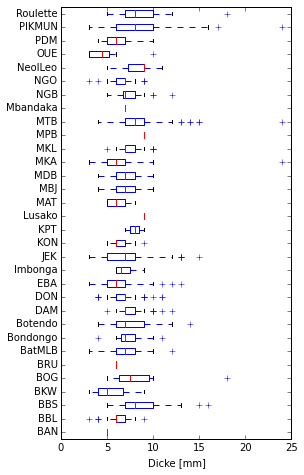

In [107]:
ax = df.boxplot(by = 'Typ', vert=False, figsize = (4, 8))
#plt.axvline(mean, color='black', ls = 'dashed', lw = 3, label='mean')
plt.xlabel("Dicke [mm]")
#legend = plt.legend(["Mittelwert"])
#legend.get_frame().set_facecolor('white')
plt.title("")
plt.suptitle("")


ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.savefig('../output/figs/2-2_Keramik_Wandungsdicke_Box.pdf', bbox_inches='tight')

* [ ] ToDo: anstatt Median, dem Interquartilsabstand (Box) und dem 1,5-Fache des Interquartilsabstands (Antennen/Whiskers) den Mittelwert und die Standartabweichung plotten?

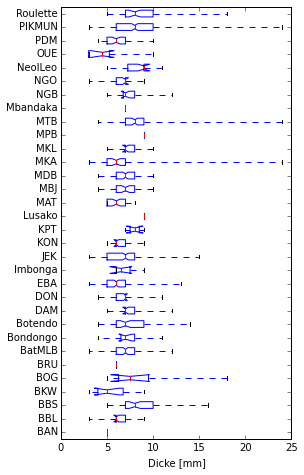

In [108]:
ax = df.boxplot(by = 'Typ', vert=False, figsize = (4, 8), notch = True, sym = '', whis = 100)
plt.xlabel("Dicke [mm]")
plt.title("")
plt.suptitle("")


ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.savefig('../output/figs/2-2_Keramik_Wandungsdicke_Box_2.pdf', bbox_inches='tight')

* jetzt zeigen die Whiskers das Min und Max der Verteilungen an (whis = 100)

Betrachtung bezogen auf Gefäßformen:

In [109]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Wandung, 
           t_Obj.Art, 
           t_Obj.Form_Gef
       FROM t_Obj 
       WHERE (((t_Obj.Wandung) <> 0)
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Gefäßformen-Einträge vereinfachen
df['Form_Gef_1'] = df['Form_Gef'].map(lambda x: str(x)[:-3])
df['Form_Gef_1'] = df['Form_Gef_1'].str.extract('(\\d)')

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


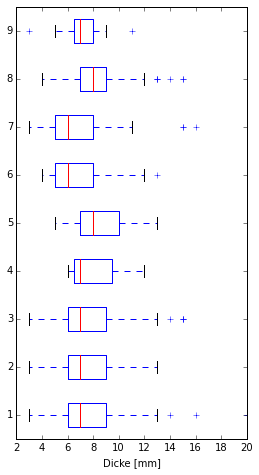

In [110]:
ax = df.boxplot(by = 'Form_Gef_1', vert=False, figsize = (4, 8))
# plt.axvline(mean, color='red', ls = 'dashed', lw = 1, label='mean')
plt.xlabel("Dicke [mm]")
# legend = plt.legend(["Mittelwert"])
# legend.get_frame().set_facecolor('white')
plt.title("")
plt.suptitle("")
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.savefig('../output/figs/2-2_Keramik_Wandungsdicke_Box_GefForm.pdf', bbox_inches='tight')

## Oberflächenbehandlung der Scherben

In [112]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Anhaftungen,
           t_Obj.Typ
       FROM t_Obj
       WHERE (((t_Obj.Art) = 'K')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df_pivot = df.pivot_table(values = 'objID', index = 'Anhaftungen', aggfunc = len)
display(df_pivot.head())

Anhaftungen
                                5205
Außen & innen Glasur?              1
Außen & innen Reste S kruste       1
Außen Eisen(?)                     1
Außen Rest eine Glasur             1
Name: objID, dtype: int64

In [113]:
df['Anhaftungen'] = df['Anhaftungen'].replace('', np.nan, regex=True)

a = pd.Series({'Oberfläche behandelt':df['Anhaftungen'].count(),
               'unbehandelt':df['Anhaftungen'].isnull().sum()})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Oberfläche behandelt,216,3.977168
unbehandelt,5215,96.022832


## Verzierungselemente
* häufigste Verzelemente
* Verzierungstechniken
* ...

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != ''))""".replace('\n',' ')
df = pd.read_sql(sql, con)
df.head(2)

,objID,posID,verzID,pos,verzName,verzBeschr,Typ,Form_Gef
0,10,2,1,1 Innen,02.1,horizontale Rille,DAM (?),E2 (?)
1,10,2,23,1 Innen,21.1,vegetabilisches Roulette/Knotted String,DAM (?),E2 (?)


Anzahl GE mit aufgenommener Verzierung:

In [3]:
len(df['objID'].unique())

3149

Anzahl der aufgenommenen Verzierungselemente:

In [4]:
len(df)

7004

Häufigkeiten:

In [5]:
df_pivot = df.pivot_table(values = 'objID', index = ['verzName', 'verzBeschr'], aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['pct'] = df_pivot['objID'] / df_pivot['objID'].sum() * 100
df_pivot = df_pivot.sort_values(by = 'objID', ascending = False)
df_pivot.head(10)

,,objID,pct
verzName,verzBeschr,,
02.1,horizontale Rille,2584,36.893204
08,banfwa-nfwa,555,7.924043
04.12,Einstichreihe/diagonal,346,4.940034
21.1,vegetabilisches Roulette/Knotted String,251,3.583666
01.2,diagonales Schachbrettmuster,241,3.440891
02.3,diagonale Rillen,188,2.684180
02.2,vertikale Rille,184,2.627070
04.15,Einstichreihe/flach/quer,172,2.455740
01.6,Winkelmuster,164,2.341519


In [6]:
df_pivot.tail(5)

,,objID,pct
verzName,verzBeschr,,
05.3,diagonale Reihe von kl. Runden Eindücken,2,0.028555
17.2,Henkel,2,0.028555
15.3,"Eindrücke; Kreise, konzentrisch, flächig",1,0.014278
02.6,dreieckige Rillen,1,0.014278
04.4,Gruppe dreieckiger Eindrücke,1,0.014278
